# Investigation of various random walks
# Problem statement:

Write a program for a one-dimensional random walk x(t), where at every time step the walk goes randomly ±1 step on the x axis. Numerically estimate the root-mean-square value of x(t) and show it is approximately proportional to
$\sqrt 2Dt $, and estimate the constant D. Calculate D analytically, and compare it to your numerical result.
Repeat with a walk where it is equally likely to go -2, -1, 1, or 2 steps.


## Part 1: Random walk with +/- 1 step

In [1]:
import os
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
times = 10**6 # set amount of steps in random walk
t = np.linspace(0, times, times) # times, with intervals of 1
# generate random walk
x = [0] 
for i in range(1,len(t)): # sum over path, adding or subtracting 1 at each interval
    rand = randint(0,1)
    if rand == 0:
        x.append(x[i-1] - 1)
    if rand == 1:
        x.append(x[i-1] + 1)

We can now plot the random path.

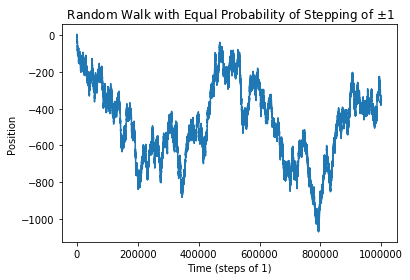

In [3]:
# plotting path
plt.figure()
plt.title(' Random Walk with Equal Probability of Stepping of $\pm 1$')
plt.plot(t, x, label='Position')
plt.xlabel('Time (steps of 1)')
plt.ylabel('Position')
plt.show()

In [4]:
# obtain rms value for x. start by defining function to take new average at each step
def root_mean_square(position):
    rms = [0]
    summ = 0 # initialize the summation
    sqx = np.power(position,2) # take square of path
    for i in range(1, len(position)): 
        summ += sqx[i] #sum over all the squares at each position
        argument = summ/len(sqx[:i]) # divide by number of steps to get average
        rms.append(np.sqrt(argument)) # make rms array
    return rms

In [5]:
rms = root_mean_square(x) #get rms of the path

Now we can determine just how proportional the root mean square of the path is proprtional to sqrt(time). We will plot them against each other.

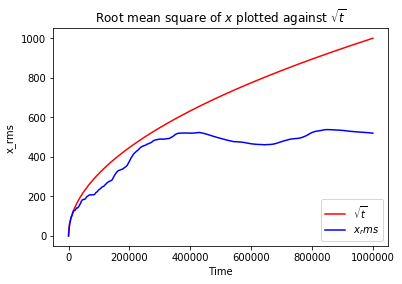

In [6]:
# plot the rms values 
plt.figure()
plt.title('Root mean square of $x$ plotted against $\sqrt{t}$')
plt.ylabel('x_rms')
plt.xlabel('Time')
plt.plot(t, np.sqrt(t), c='red', label='$\sqrt{t}$') # show that it follows analytical behaviour
plt.plot(t, rms, c='blue', label='$x_rms$')
plt.legend(loc='lower right')
plt.show()

Just visually, it is clear that the two functions are proportional. We will now plot their ratio to see how their proportionality evolves as the number of steps increases.

In [7]:
#take ratio of rms to sqrt of time
prop = np.divide(rms[1:], np.sqrt(2*t[1:])) # exclude the first 0 division

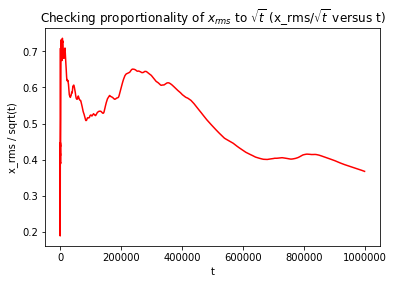

In [8]:
# plot the ratio
plt.figure()
plt.title('Checking proportionality of $x_{rms}$ to $\sqrt{t}$ (x_rms/$\sqrt{t}$ versus t)')
plt.plot(t[1:], prop, c='red')
plt.ylabel('x_rms / sqrt(t)')
plt.xlabel('t')
plt.show()

As time evolves, the proportionality starts to stabilize (become constant). In written assignment, we get that D=1/2 Analytically, we can calculate D as being = 1/2 since $$x_{rms} = \sqrt t.$$

In [9]:
# compute D assuming the relation X_rms = sqrt(2Dt)
# moreover, we will take the largest value of x_{rms} and $t$ to do this
def find_D(D_analyt, rootms, time):
    D_numerical = rootms[-1]**2/(2*time[-1]) # estimate numerical D using generated arrays in D = xrms^2/(2t)
    print('Analytical D: %1.3f' %D_analyt)
    print('Numerical obtained D: %1.3f' %D_numerical) # check the value
    difference_between_values = abs(D_numerical-D_analyt)
    print('Difference = %1.3f' %difference_between_values)

Please the analytic calculation a) to see the theoretical derivation of the diffusion coefficient D.

In [10]:
find_D(1.0/2, rms, t)

Analytical D: 0.500
Numerical obtained D: 0.135
Difference = 0.365


This is a relatively small difference for a rough estimate at (once again, relatively) low time count.

## Part 2: Random walk with +/- 1, +/- 2 steps

In [11]:
# we regenerate a random walk, but this time with the option of doing +2 steps or -2 steps
y = [0]
for i in range(1, len(t)):
    rand = randint(0,3) # create four random params to generate
    if rand == 0: # if 0, -2
        y.append(y[i-1] - 2)
    if rand == 1: # if 1, -1
        y.append(y[i-1] - 1)
    if rand == 2: # if 2, +1
        y.append(y[i-1] + 1)
    if rand == 3: # if 3, +2
        y.append(y[i-1] +2)

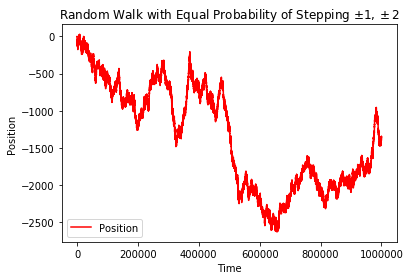

In [12]:
# plot the path
plt.figure()
plt.title('Random Walk with Equal Probability of Stepping $\pm 1,\pm 2$')
plt.ylabel('Position')
plt.xlabel('Time')
plt.plot(t, y, c='red',label='Position')
plt.legend(loc='lower left')
plt.show()

In [13]:
#Get rms of this path
rms_2 = root_mean_square(y)

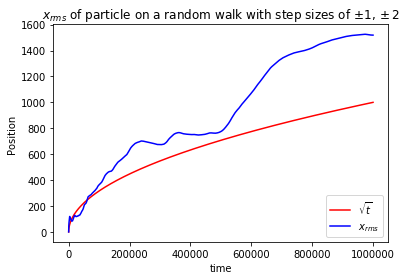

In [14]:
#plot the rms versus srt(t) to visualize their proportionality
plt.figure()
plt.title('$x_{rms}$ of particle on a random walk with step sizes of $\pm 1, \pm 2$')
plt.plot(t, np.sqrt(t), c='red',label='$\sqrt{t}$')
plt.plot(t, rms_2, c='blue',label='$x_{rms}$')
plt.legend(loc='lower right')
plt.xlabel('time')
plt.ylabel('Position')
plt.show()

In [15]:
#Get proportionality of the path to sqrt(t)
prop_2 = np.divide(rms_2[1:], np.sqrt(2*t[1:]))

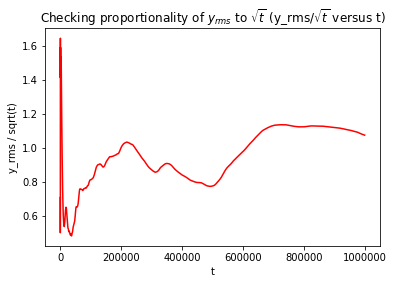

In [16]:
# plot the ratio
plt.figure()
plt.title('Checking proportionality of $y_{rms}$ to $\sqrt{t}$ (y_rms/$\sqrt{t}$ versus t)')
plt.plot(t[1:], prop_2, c='red')
plt.ylabel('y_rms / sqrt(t)')
plt.xlabel('t')
plt.show()

Again, the proportionality seems to stabilize as time goes on.

Please the analytic calculation b) to see the theoretical derivation of the diffusion coefficient D for this kind of random walk (4 step options).

In [17]:
D_analytical_2 = 5/4
find_D(D_analytical_2, rms_2, t)

Analytical D: 1.250
Numerical obtained D: 1.154
Difference = 0.096


This difference is larger than the previous case which had less options for each step.